In [1]:
import pandas as pd
import glob, os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
all_files = glob.glob(os.path.join('data', 'receitas_candidatos_2014_*.txt'))
df_from_each_file = (pd.read_csv(f, sep=';', encoding='latin-1') for f in all_files)
df_tse = pd.concat(df_from_each_file, ignore_index=True)

/Users/victorbursztyn/Documents/Ventures/ref_trabalhista/venv/lib/python2.7/site-packages/ipykernel_launcher.py:3: DtypeWarning: Columns (13,19,27) have mixed types. Specify dtype option on import or set low_memory=False.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
df_tse.head(3)

,Cód. Eleição,Desc. Eleição,Data e hora,CNPJ Prestador Conta,Sequencial Candidato,UF,Sigla Partido,Numero candidato,Cargo,Nome candidato,...,Valor receita,Tipo receita,Fonte recurso,Especie recurso,Descricao da receita,CPF/CNPJ do doador originário,Nome do doador originário,Tipo doador originário,Setor econômico do doador originário,Nome do doador originário (Receita Federal)
0,143,Eleições Gerais 2014,19/08/201520:56:37,20570764000120,10000000154,AC,PC do B,654,Senador,MARIA PERPETUA DE ALMEIDA,...,5082,Recursos de outros candidatos/comitês,Outros Recursos nao descritos,Estimado,DOAÇÃO DE 23.100·00 ETIQUETAS ADESIVAS,10637472000103,OLIVER PRINT ADESIVOS LTDA,J,Impressão de material para outros usos,OLIVER PRINT ADESIVOS LTDA - ME
1,143,Eleições Gerais 2014,19/08/201520:56:37,20561402000172,10000000022,AC,PDT,12012,Deputado Estadual,ZENILDO VIEIRA DA SILVA,...,5000,Recursos de outros candidatos/comitês,Outros Recursos nao descritos,Cheque,#NULO,07568434000131,IMPACTO INDUSTRIA TERRAPLANAGEM E CONSTRUTORA ...,J,Fabricação de outros artefatos e produtos de c...,"IMPACTO INDUSTRIA, TERRAPLENAGEM E CONSTRUCOES..."
2,143,Eleições Gerais 2014,19/08/201520:56:37,20569982000144,10000000206,AC,PEN,51012,Deputado Estadual,ASTÉRIO DE PAULA MOREIRA FILHO,...,10000,Recursos de outros candidatos/comitês,Outros Recursos nao descritos,Cheque,#NULO,07568434000131,IMPACTO INDUSTRIA· TERRAPLANAGEM E CONSTRUCOES...,J,Fabricação de outros artefatos e produtos de c...,"IMPACTO INDUSTRIA, TERRAPLENAGEM E CONSTRUCOES..."


In [4]:
df_tse.columns

Index([u'Cód. Eleição', u'Desc. Eleição', u'Data e hora',
       u'CNPJ Prestador Conta', u'Sequencial Candidato', u'UF',
       u'Sigla  Partido', u'Numero candidato', u'Cargo', u'Nome candidato',
       u'CPF do candidato', u'Numero Recibo Eleitoral', u'Numero do documento',
       u'CPF/CNPJ do doador', u'Nome do doador',
       u'Nome do doador (Receita Federal)', u'Sigla UE doador',
       u'Número partido doador', u'Número candidato doador',
       u'Cod setor econômico do doador', u'Setor econômico do doador',
       u'Data da receita', u'Valor receita', u'Tipo receita', u'Fonte recurso',
       u'Especie recurso', u'Descricao da receita',
       u'CPF/CNPJ do doador originário', u'Nome do doador originário',
       u'Tipo doador originário', u'Setor econômico do doador originário',
       u'Nome do doador originário (Receita Federal)'],
      dtype='object')

In [5]:
df_tse = df_tse.loc[(df_tse['Cargo'] == 'Deputado Federal')].reset_index()

In [6]:
df_tse = df_tse[[u'Nome candidato', u'CPF do candidato',
                 u'Valor receita', u'Nome do doador originário',
                 u'CPF/CNPJ do doador originário']]

In [7]:
all_files = glob.glob(os.path.join('data', 'consulta_cand_2014_*.txt'))
df_from_each_file = (pd.read_csv(f, header=None, sep=';', encoding='latin-1') for f in all_files)
df_details = pd.concat(df_from_each_file, ignore_index=True)

In [8]:
df_details = df_details.loc[(df_details[9] == 'DEPUTADO FEDERAL')].reset_index()

In [9]:
df_details = df_details[[10,13,14]]

In [10]:
df_details.head()

,10,13,14
0,JÉSSICA ROJAS SALES,65595564253,JÉSSICA SALES
1,JOAQUIM LIRA DE CARVALHO,30823323234,JOAQUIM LYRA
2,REGINA AMELIA D ALENCAR LINO,15024229134,REGINA LINO
3,LUIZ ANUTE DOS SANTOS,30800773268,LUIZ ANUTE
4,FRANCISCO CARLOS OLIVEIRA DE LIMA,30842735291,CHICARLOS


In [11]:
df_tse = df_tse.merge(df_details.rename(columns={14 : u'Nome de campanha'}),
                      left_on=u'CPF do candidato', right_on=13, how='outer')

In [12]:
df_tse = df_tse[[u'Nome de campanha', u'Valor receita',
                 u'Nome do doador originário', u'CPF/CNPJ do doador originário']]

In [13]:
df_tse.head(3)

,Nome de campanha,Valor receita,Nome do doador originário,CPF/CNPJ do doador originário
0,ALAN RICK,600,CRISTÁLIA PRODUTOS QUÍMICOS FARMACÊUTICOS LTDA,44734671000151
1,ALAN RICK,"1370,4",CRISTÁLIA PRODUTOS QUÍMICOS FARMACÊUTICOS LTDA,44734671000151
2,ALAN RICK,50000,CRBS S/A,56228356000131


In [14]:
df_voters = pd.read_csv(os.path.join('data', 'voters.csv'), header=None, encoding='utf-8')

In [15]:
df_voters[u'Nome em uppercase'] = df_voters[0].str.upper()

In [16]:
df_voters.head(3)

,0,1,Nome em uppercase
0,Luiza Erundina,N,LUIZA ERUNDINA
1,Roberto Alves,S,ROBERTO ALVES
2,Lázaro Botelho,S,LÁZARO BOTELHO


In [17]:
df_tse = df_tse.merge(df_voters.rename(columns={ 1: 'Voto' }),
                      left_on=u'Nome de campanha', right_on=u'Nome em uppercase', how='outer')

In [18]:
df_tse.columns

Index([             u'Nome de campanha',                 u'Valor receita',
           u'Nome do doador originário', u'CPF/CNPJ do doador originário',
                                      0,                          u'Voto',
                   u'Nome em uppercase'],
      dtype='object')

In [19]:
keep_cols = [c for c in df_tse.columns if c not in [0, u'Nome em uppercase'] ]
df_tse = df_tse[keep_cols]

In [20]:
df_tse.head(10)

,Nome de campanha,Valor receita,Nome do doador originário,CPF/CNPJ do doador originário,Voto
0,ALAN RICK,600,CRISTÁLIA PRODUTOS QUÍMICOS FARMACÊUTICOS LTDA,44734671000151,S
1,ALAN RICK,"1370,4",CRISTÁLIA PRODUTOS QUÍMICOS FARMACÊUTICOS LTDA,44734671000151,S
2,ALAN RICK,50000,CRBS S/A,56228356000131,S
3,ALAN RICK,1300,FRIOS VILHENA IMP. E EXP. LTDA,00240681000165,S
4,ALAN RICK,256,FRIOS VILHENA IMP. E EXP. LTDA,00240681000165,S
5,ALAN RICK,1900,FRIOS VILHENA IMP. E EXP. LTDA,00240681000165,S
6,ALAN RICK,1738,FRIOS VILHENA IMP. E EXP. LTDA,00240681000165,S
7,ALAN RICK,1500,A. C. D. A. IMP. E EXP. LTDA,84308980000184,S
8,ALAN RICK,138,A. C. D. A. IMP. E EXP. LTDA,84308980000184,S
9,ALAN RICK,760,A. C. D. A. IMP. E EXP. LTDA,84308980000184,S


In [21]:
df_tse = df_tse.dropna()

In [22]:
df_tse.count()

Nome de campanha                 41760
Valor receita                    41760
Nome do doador originário        41760
CPF/CNPJ do doador originário    41760
Voto                             41760
dtype: int64

In [23]:
df_tse[u'Valor'] = df_tse[u'Valor receita'].apply( lambda x: int(float(x.replace(',','.'))) )

In [24]:
df_tse_yes = df_tse.loc[(df_tse[u'Voto'] == 'S')][[u'Valor', u'CPF/CNPJ do doador originário']]

In [25]:
df_tse_yes.count()

Valor                            24152
CPF/CNPJ do doador originário    24152
dtype: int64

In [26]:
df_tse_no = df_tse.loc[(df_tse[u'Voto'] == 'N')][[u'Valor', u'CPF/CNPJ do doador originário']]

In [27]:
df_tse_no.count()

Valor                            17608
CPF/CNPJ do doador originário    17608
dtype: int64

In [28]:
df_yes_supporters = df_tse_yes.groupby(u'CPF/CNPJ do doador originário').sum()

In [29]:
df_no_supporters = df_tse_no.groupby(u'CPF/CNPJ do doador originário').sum()

In [30]:
df_top_yes = df_yes_supporters.sort(u'Valor', ascending=False).head(11).ix[1:] #Remove top donor ("#NULO")

/Users/victorbursztyn/Documents/Ventures/ref_trabalhista/venv/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


In [31]:
df_top_no = df_no_supporters.sort(u'Valor', ascending=False).head(11).ix[1:] #Remove top donor ("#NULO")

/Users/victorbursztyn/Documents/Ventures/ref_trabalhista/venv/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


In [32]:
df_company_names = df_tse[[u'Nome do doador originário', u'CPF/CNPJ do doador originário']]
yes_labels = [df_company_names.loc[ df_company_names[u'CPF/CNPJ do doador originário'] == v][u'Nome do doador originário'].values[0] \
            for v in df_top_yes.index.values]

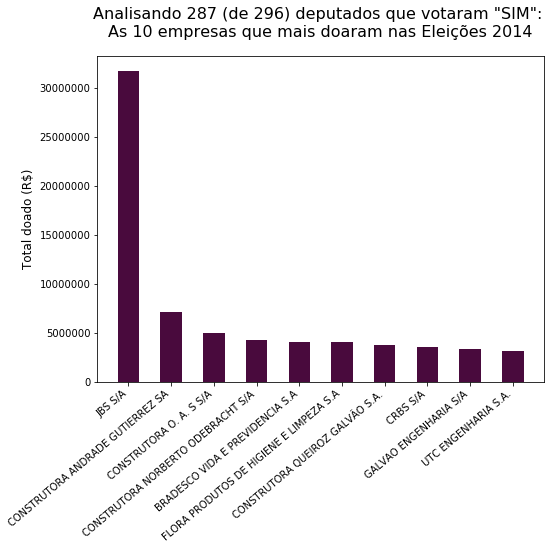

In [33]:
plot_title = u'Analisando %s (de 296) deputados que votaram "SIM": \nAs 10 empresas que mais doaram nas Eleições 2014'\
             %len(df_tse.loc[(df_tse[u'Voto'] == 'S')][u'Nome de campanha'].unique())

plt.figure(figsize=(8,6))
plt.title(plot_title, y=1.04, fontsize=16)
plt.bar(range(len(df_top_yes.index.values)), df_top_yes[u'Valor'].values, 0.5, color='#490A3D')
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(range(len(df_top_yes.index.values)), yes_labels, rotation=40, horizontalalignment='right')
plt.ylabel('Total doado (R$)', fontsize=12)
plt.show()

In [34]:
no_labels = [df_company_names.loc[ df_company_names[u'CPF/CNPJ do doador originário'] == v][u'Nome do doador originário'].values[0] \
            for v in df_top_no.index.values]

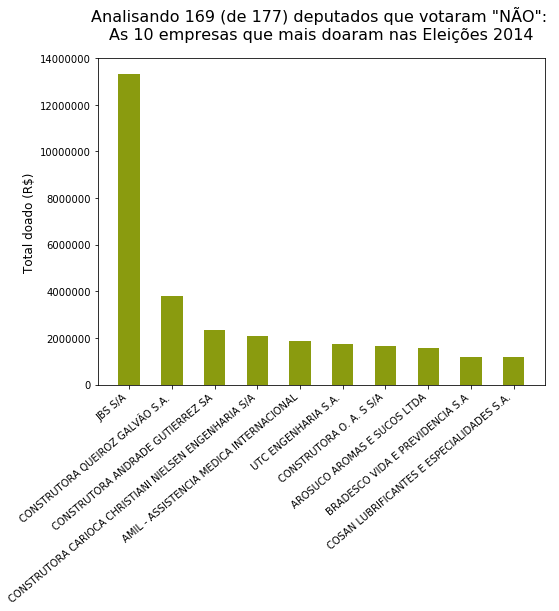

In [35]:
plot_title = u'Analisando %s (de 177) deputados que votaram "NÃO": \nAs 10 empresas que mais doaram nas Eleições 2014'\
             %len(df_tse.loc[(df_tse[u'Voto'] == 'N')][u'Nome de campanha'].unique())

plt.figure(figsize=(8,6))
plt.title(plot_title, y=1.04, fontsize=16)
plt.bar(range(len(df_top_no.index.values)), df_top_no[u'Valor'].values, 0.5, color='#8A9B0F')
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(range(len(df_top_no.index.values)), no_labels, rotation=40, horizontalalignment='right')
plt.ylabel('Total doado (R$)', fontsize=12)
plt.show()

In [36]:
df_top_20_yes = df_yes_supporters.sort(u'Valor', ascending=False).head(21).ix[1:] #Remove top donor ("#NULO")
contrast_labels = [df_company_names.loc[ df_company_names[u'CPF/CNPJ do doador originário'] == v][u'Nome do doador originário'].values[0] \
                  for v in df_top_20_yes.index.values]

/Users/victorbursztyn/Documents/Ventures/ref_trabalhista/venv/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  """Entry point for launching an IPython kernel.


In [37]:
df_contrast = df_top_20_yes.merge(df_no_supporters, left_index=True, right_index=True, how='outer').ix[:20]

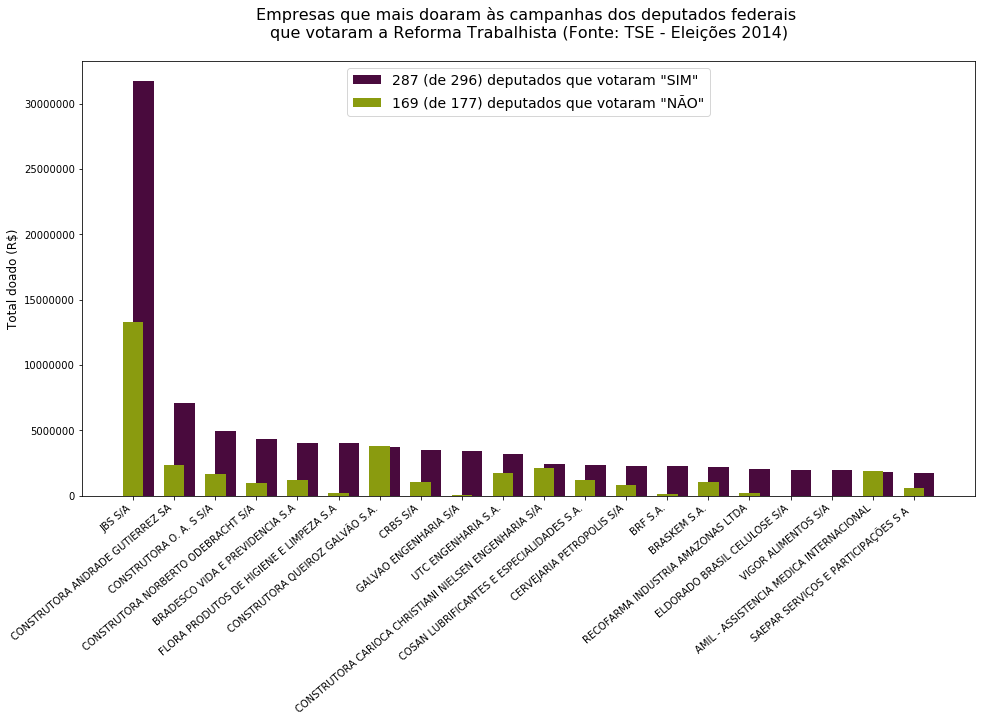

In [40]:
plot_title = u'Empresas que mais doaram às campanhas dos deputados federais \nque votaram a Reforma Trabalhista (Fonte: TSE - Eleições 2014)'

plt.figure(figsize=(16,8))
plt.title(plot_title, y=1.04, fontsize=16)
plt.bar(range(len(df_contrast.index.values)), df_contrast[u'Valor_x'].values, 0.5, align='edge', color='#490A3D', \
        label=u'287 (de 296) deputados que votaram "SIM"')
plt.bar(range(len(df_contrast.index.values)), df_contrast[u'Valor_y'].values, 0.5, color='#8A9B0F', \
       label=u'169 (de 177) deputados que votaram "NÃO"')
plt.ticklabel_format(axis='y', style='plain')
plt.xticks(range(len(df_top_20_yes.index.values)), contrast_labels, rotation=40, horizontalalignment='right')
plt.ylabel('Total doado (R$)', fontsize=12)
plt.legend(fontsize=14)
plt.show()